In [4]:
# Import necessary libraries
import numpy as np
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from keras.preprocessing.image import ImageDataGenerator


In [5]:

# Define a simple CNN model
def SimpleCNN(input_shape):
    X_input = Input(input_shape)

    # First convolutional block
    X = Conv2D(32, (3, 3), padding='same', name='conv1')(X_input)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='maxpool1')(X)

    # Second convolutional block
    X = Conv2D(64, (3, 3), padding='same', name='conv2')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='maxpool2')(X)

    # Third convolutional block
    X = Conv2D(128, (3, 3), padding='same', name='conv3')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='maxpool3')(X)

    # Flatten and fully connected layers
    X = Flatten()(X)
    X = Dense(256, activation='relu', name='fc1')(X)
    X = Dropout(0.5)(X)  # Dropout layer to prevent overfitting
    X = Dense(3, activation='softmax', name='output')(X)  # Change to 3 for 3 classes

    model = Model(inputs=X_input, outputs=X, name='SimpleCNN')
    return model



In [6]:
# Set up data generators with data augmentation
data_gen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% of data will be used for validation
)

train_generator = data_gen.flow_from_directory(
    '/workspace/Surbhi maam/Minor/extracted_dataset/dataset',  # Path to your dataset
    target_size=(128, 128),  # Adjust size as needed
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Set as training data
)

validation_generator = data_gen.flow_from_directory(
    '/workspace/Surbhi maam/Minor/extracted_dataset/dataset',  # Path to your dataset
    target_size=(128, 128),  # Adjust size as needed
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)


Found 15067 images belonging to 3 classes.
Found 3765 images belonging to 3 classes.


In [7]:

# Create the model
model = SimpleCNN((128, 128, 3))  # Adjust input shape as needed


2024-11-11 06:51:25.387508: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [8]:

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [9]:
# Train the model
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)



Epoch 1/10
471/471 [==============================] - 142s 299ms/step - loss: 1.4279 - accuracy: 0.4901 - val_loss: 1.9590 - val_accuracy: 0.2343
Epoch 2/10
471/471 [==============================] - 133s 283ms/step - loss: 0.8661 - accuracy: 0.5114 - val_loss: 0.8190 - val_accuracy: 0.5323
Epoch 3/10
471/471 [==============================] - 167s 355ms/step - loss: 0.8632 - accuracy: 0.5180 - val_loss: 1.1646 - val_accuracy: 0.3086
Epoch 4/10
471/471 [==============================] - 169s 358ms/step - loss: 0.8548 - accuracy: 0.5203 - val_loss: 1.9216 - val_accuracy: 0.2393
Epoch 5/10
471/471 [==============================] - 167s 354ms/step - loss: 0.8361 - accuracy: 0.5190 - val_loss: 0.8168 - val_accuracy: 0.4534
Epoch 6/10
471/471 [==============================] - 157s 332ms/step - loss: 0.8247 - accuracy: 0.5199 - val_loss: 0.8914 - val_accuracy: 0.3227
Epoch 7/10
471/471 [==============================] - 131s 278ms/step - loss: 0.8267 - accuracy: 0.5238 - val_loss: 0.7782 -

In [11]:

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy*100:.2f}')

118/118 [==============================] - 20s 171ms/step - loss: 0.8348 - accuracy: 0.5479
Validation Accuracy: 54.79


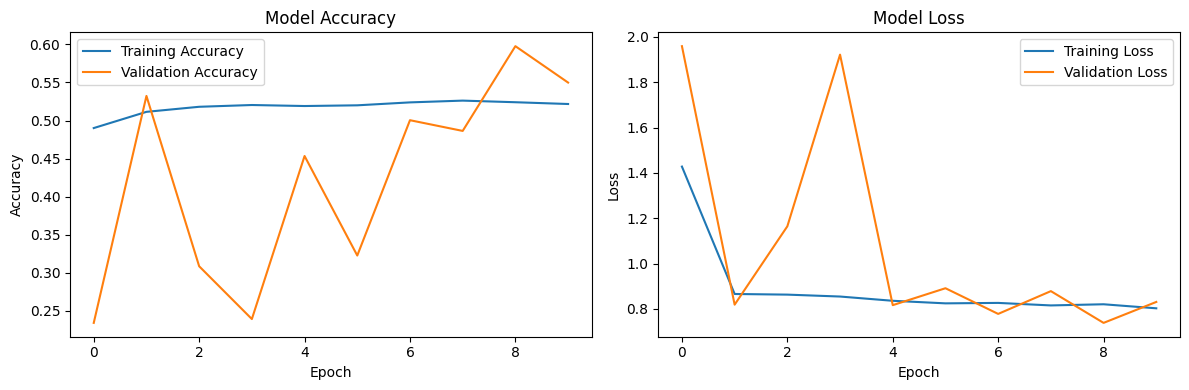

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


In [13]:
model.save('vgg_model.h5')

/usr/local/lib/python3.8/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
